# Part II – What Drives BorrowerAPR
### by Marah Salahat

## Investigation Overview
This analysis investigates the main factors that influence the **BorrowerAPR** (Annual Percentage Rate) in Prosper Loans.  
The goal is to understand how **borrower risk, income level, and loan characteristics** affect the interest rates offered to borrowers.

### Executive Summary
From the exploratory analysis, key insights showed that:
1. **Borrower risk ratings** (`CreditGrade` / `ProsperRating`) have the strongest effect on BorrowerAPR — lower-rated borrowers consistently receive higher APRs.
2. **Income range and employment status** play a secondary but noticeable role — higher income borrowers tend to get lower APRs.
3. **Loan amount and term** also affect APR — smaller loans and shorter terms tend to have higher APRs.
4. These findings reflect lenders’ risk-based pricing strategies: borrowers with higher perceived risk face higher costs of borrowing.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df= pd.read_csv("prosperLoanData.csv")

## Visualization 1 – BorrowerAPR by Credit Grade

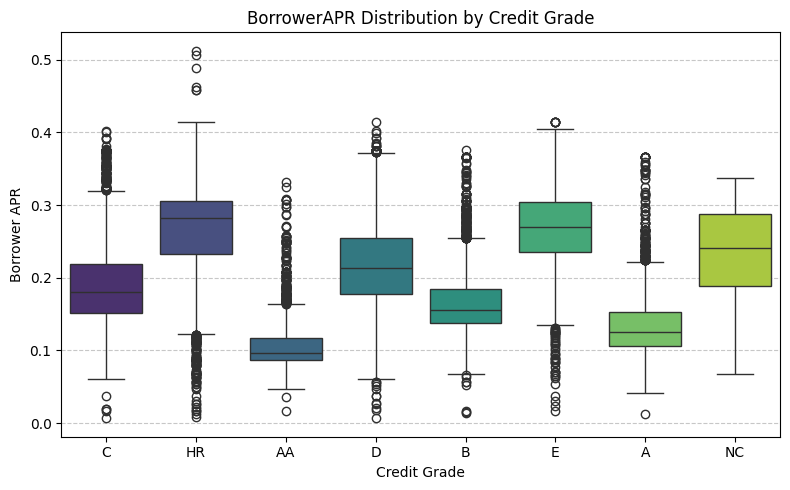

In [3]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='CreditGrade', y='BorrowerAPR', palette='viridis')
plt.title('BorrowerAPR Distribution by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Borrower APR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**BorrowerAPR varies significantly by credit grade.**  
As the borrower’s credit grade improves (from HR → AA), the median APR drops sharply.  
This clear negative relationship confirms that **lenders adjust interest rates primarily based on borrower creditworthiness.**


## Visualization 2 — APR vs. Income Range

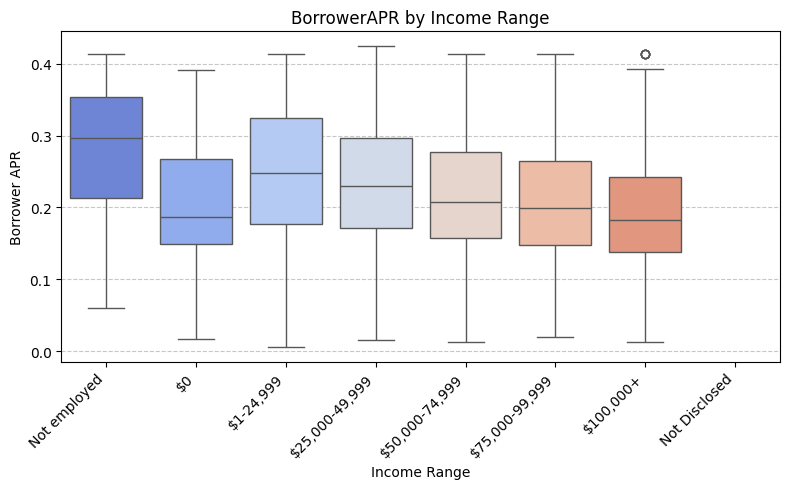

In [4]:
plt.figure(figsize=(8,5))
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
         '$75,000-99,999', '$100,000+', 'Not Disclosed']
sns.boxplot(data=df, x='IncomeRange', y='BorrowerAPR', order=order, palette='coolwarm')
plt.title('BorrowerAPR by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**The chart shows a general downward trend in APR as income range increases.**  
Borrowers earning over \$100,000 typically receive **lower APRs**, while those under \$25,000 or unemployed face **significantly higher APRs**.  
This suggests lenders consider income as a **secondary risk factor**, reflecting ability to repay.


## Visualization 3 — Loan Amount & Term Effects on APR

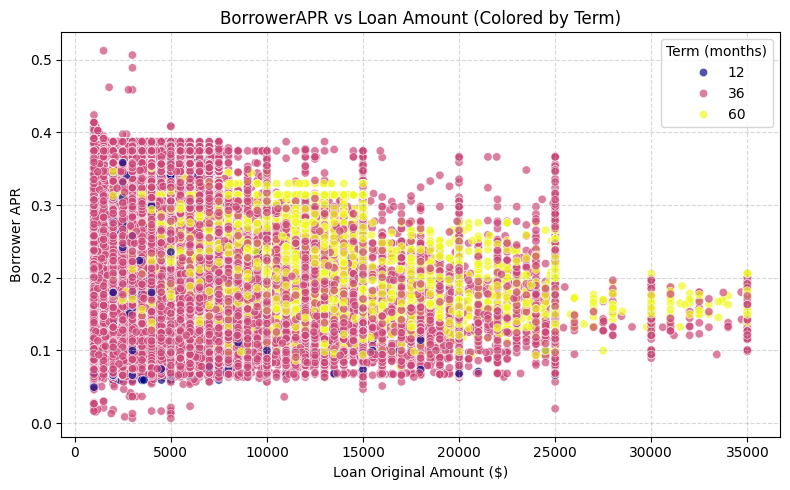

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR',
                hue='Term', palette='plasma', alpha=0.7)
plt.title('BorrowerAPR vs Loan Amount (Colored by Term)')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower APR')
plt.legend(title='Term (months)', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- The scatterplot shows that **smaller loans** tend to carry **higher APRs**, likely due to administrative costs and higher risk per dollar lent.  
- Longer loan terms (60 months) usually have **slightly lower APRs** for similar amounts, as lenders spread risk over a longer repayment period.  
- This indicates loan structure modestly affects pricing but is secondary to credit and income factors.


## Conclusion and Key Insights

From the visual analysis, the key drivers of BorrowerAPR are:

1. **Creditworthiness (CreditGrade / ProsperRating)** — The dominant factor influencing APR. Borrowers with poor ratings face significantly higher rates.
2. **Income Level** — Higher income borrowers enjoy lower APRs, likely due to better repayment ability.
3. **Loan Characteristics (Amount, Term)** — Smaller, short-term loans tend to have higher APRs.

These findings align with standard credit risk modeling principles — lenders use borrower risk and repayment capacity to price loans.  
The combination of these features can help predict APRs and inform both borrowers and lending institutions about risk-based pricing behavior.
